In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


**Generate 3-class dataset**

In [2]:
class1 = np.random.randn(100, 2) + np.array([2, 2])
class2 = np.random.randn(100, 2) + np.array([-2, -2])
class3 = np.random.randn(100, 2) + np.array([2, -2])

X = np.vstack((class1, class2, class3))
Y = np.array([0]*100 + [1]*100 + [2]*100)


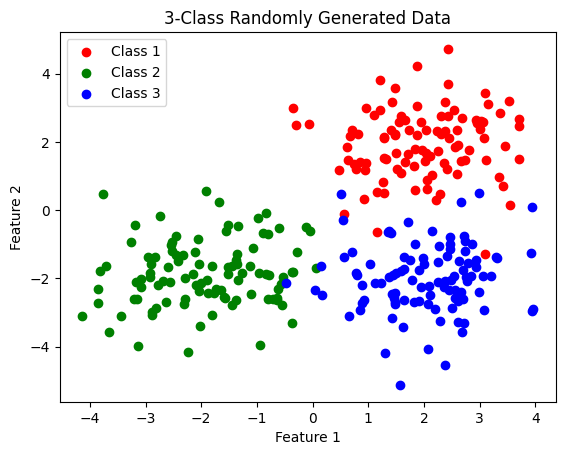

In [3]:
plt.figure()
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='r', label='Class 1')
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='g', label='Class 2')
plt.scatter(X[Y==2, 0], X[Y==2, 1], c='b', label='Class 3')
plt.title("3-Class Randomly Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



In [4]:
Y_encoded = np.eye(3)[Y]

**Neural Network Class**

In [5]:
class NeuralNetwork:
    def __init__(self):
        self.W_HI = np.random.randn(2, 10)
        self.W_OH = np.random.randn(10, 3)
        self.learning_rate = 0.2

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden_output = self.sigmoid(np.dot(X, self.W_HI))
        output = self.sigmoid(np.dot(self.hidden_output, self.W_OH))
        return output

    def backPropagation(self, X, Y, output):
        output_delta = (Y - output) * self.learning_rate * self.sigmoid(output, der=True)
        hidden_delta = output_delta.dot(self.W_OH.T) * self.learning_rate * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

Epoch 0, Error: 0.16982
Epoch 2000, Error: 0.01330
Epoch 4000, Error: 0.01275
Epoch 6000, Error: 0.01244
Epoch 8000, Error: 0.01224


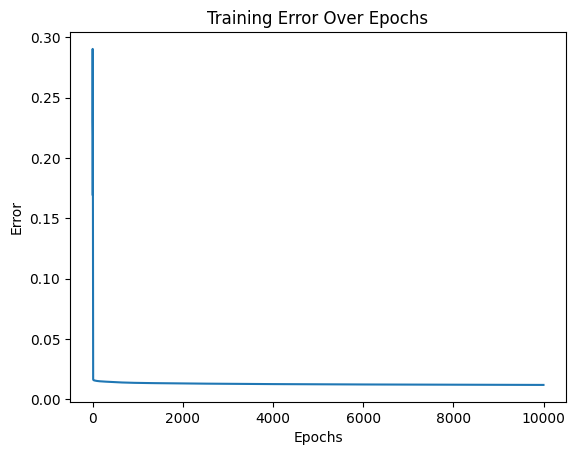

In [6]:
NN = NeuralNetwork()
errors = []

for epoch in range(10000):
    NN.train(X, Y_encoded)
    error = np.mean(np.square(Y_encoded - NN.feedForward(X)))
    errors.append(error)

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Error: {error:.5f}")


plt.plot(errors)
plt.title("Training Error Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()


### **Training Accuracy**

In [7]:
pred_classes = np.argmax(NN.feedForward(X), axis=1)
accuracy = np.mean(pred_classes == Y)
print(f"Training Accuracy: {accuracy*100:.2f}%")

Training Accuracy: 98.00%
